In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
from keras.datasets import cifar10

In [10]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 200s 1us/step


In [18]:
len(X_train[0][0])

32

In [68]:
X_train.shape

(50000, 32, 32, 3)

In [70]:
y_train.shape

(50000, 1)

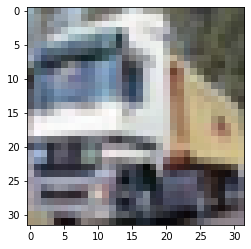

In [31]:
plt.imshow(X_train[1])
plt.show()

In [33]:
print('Label of image 0 is', y_train[1])

Label of image 0 is [9]


In [41]:
print(y_train[0])

[6]


In [ ]:
np.max(X_train)

In [97]:
X_train_reshaped = X_train.reshape(50000, 32, 32, 3) / 255
X_test_reshaped = X_test.reshape(10000, 32, 32, 3) / 255

In [99]:
X_train_reshaped.shape

(50000, 32, 32, 3)

In [ ]:
pd.DataFrame(y_train).head()

In [39]:
from keras.utils import to_categorical

y_train_coded = to_categorical(y_train)
y_test_coded = to_categorical(y_test)

print(y_train_coded[0])

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [47]:
pd.DataFrame(y_train_coded).head()

,0,1,2,3,4,5,6,7,8,9
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [55]:
def plot_history(history): 
    fig, ax = plt.subplots(1, 2, figsize=(14, 5))

    ax[0].plot(history.history['loss'])
    ax[0].set_xlabel('Epochs')
    ax[0].set_ylim([0, 2])
    ax[0].set_title('Loss over Epochs')
    ax[0].plot(history.history['val_loss'])
    ax[0].legend(['Training loss', 'Prediction loss'])

    ax[1].plot(history.history['acc'])
    ax[1].set_xlabel('Epochs')
    ax[1].set_ylim([0, 1])
    ax[1].set_title('Accuracy over Epochs')
    ax[1].plot(history.history['val_acc'])
    ax[1].legend(['Training accuracy', 'Prediction accuracy'])

    fig.suptitle("Model Quality over Epochs")

    plt.show()

In [165]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization

model_1 = Sequential()
model_1.add(Conv2D(5, kernel_size=3, activation='relu', input_shape=(32, 32, 3), padding='same', strides=2, dilation_rate=1))
model_1.add(MaxPool2D(2))
model_1.add(BatchNormalization())

model_1.add(Conv2D(15, kernel_size=3, activation='relu', input_shape=(32, 32, 3), padding='same', strides=1, dilation_rate=1))
model_1.add(MaxPool2D(2))
model_1.add(Flatten())
model_1.add(Dense(10, activation='softmax'))

In [166]:
model_1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_33 (Conv2D)           (None, 16, 16, 5)         140       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 8, 8, 5)           0         
_________________________________________________________________
batch_normalization_4 (Batch (None, 8, 8, 5)           20        
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 8, 8, 15)          690       
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 4, 4, 15)          0         
_________________________________________________________________
flatten_30 (Flatten)         (None, 240)               0         
_________________________________________________________________
dense_40 (Dense)             (None, 10)                2410      
Total para

In [157]:
model_1.compile(
    optimizer='adam',
    loss='categorical_crossentropy', 
    metrics=['accuracy']
)

In [161]:
model_1_training = model_1.fit(
    X_train_reshaped,
    y_train_coded, 
    validation_data=(X_test_reshaped, y_test_coded),
    epochs=25,
    batch_size=64
)

Train on 50000 samples, validate on 10000 samples
Epoch 1/5
50000/50000 [==============================] - 23s 453us/step - loss: 1.5328 - acc: 0.4559 - val_loss: 1.5878 - val_acc: 0.4399
Epoch 2/5
50000/50000 [==============================] - 23s 453us/step - loss: 1.4987 - acc: 0.4682 - val_loss: 1.5250 - val_acc: 0.4539
Epoch 3/5
50000/50000 [==============================] - 23s 463us/step - loss: 1.4687 - acc: 0.4804 - val_loss: 1.4832 - val_acc: 0.4785
Epoch 4/5
50000/50000 [==============================] - 23s 470us/step - loss: 1.4453 - acc: 0.4894 - val_loss: 1.4687 - val_acc: 0.4768
Epoch 5/5
50000/50000 [==============================] - 24s 489us/step - loss: 1.4229 - acc: 0.4983 - val_loss: 1.4276 - val_acc: 0.4929


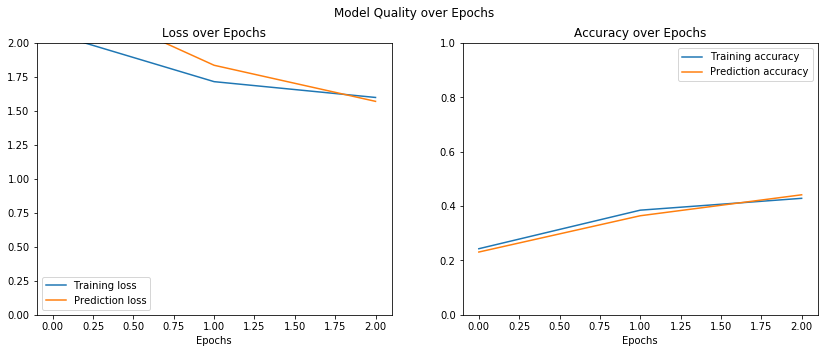

In [160]:
plot_history(model_1_training)

In [210]:
model_2 = Sequential()

model_2.add(Conv2D(32, kernel_size=3, input_shape=(32, 32, 3), activation='relu', padding='same', strides=2))
model_2.add(BatchNormalization())

model_2.add(MaxPool2D(2))
model_2.add(Dropout(0.25))

model_2.add(Conv2D(16, kernel_size=3, activation='relu', padding='same', dilation_rate=2))
model_2.add(BatchNormalization())

model_2.add(MaxPool2D(2))
model_2.add(Dropout(0.35))

model_2.add(Flatten())
model_2.add(Dense(10, activation='softmax'))

In [211]:
model_2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_111 (Conv2D)          (None, 16, 16, 32)        896       
_________________________________________________________________
batch_normalization_77 (Batc (None, 16, 16, 32)        128       
_________________________________________________________________
max_pooling2d_59 (MaxPooling (None, 8, 8, 32)          0         
_________________________________________________________________
dropout_40 (Dropout)         (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_112 (Conv2D)          (None, 8, 8, 16)          4624      
_________________________________________________________________
batch_normalization_78 (Batc (None, 8, 8, 16)          64        
_________________________________________________________________
max_pooling2d_60 (MaxPooling (None, 4, 4, 16)          0         
__________

In [212]:
model_2.compile(optimizer='adam',
               loss='categorical_crossentropy',
               metrics=['accuracy'])

In [213]:
model_2_training = model_2.fit(
   X_train_reshaped,
    y_train_coded, 
    validation_data=(X_test_reshaped, y_test_coded),
    epochs=25,
    batch_size=64)

Train on 50000 samples, validate on 10000 samples
Epoch 1/5
50000/50000 [==============================] - 137s 3ms/step - loss: 2.8664 - acc: 0.1981 - val_loss: 1.9064 - val_acc: 0.3342
Epoch 2/5
50000/50000 [==============================] - 154s 3ms/step - loss: 2.1019 - acc: 0.2930 - val_loss: 1.6885 - val_acc: 0.4130
Epoch 3/5
50000/50000 [==============================] - 182s 4ms/step - loss: 1.8563 - acc: 0.3528 - val_loss: 1.5763 - val_acc: 0.4404
Epoch 4/5
50000/50000 [==============================] - 222s 4ms/step - loss: 1.7245 - acc: 0.3884 - val_loss: 1.5502 - val_acc: 0.4324
Epoch 5/5
50000/50000 [==============================] - 195s 4ms/step - loss: 1.6215 - acc: 0.4142 - val_loss: 1.5517 - val_acc: 0.4302


In [214]:
plot_history(model_2_training)

NameError: name 'model_2_training' is not defined

In [196]:
model_3 = Sequential()

model_3.add(Conv2D(32, kernel_size=3, input_shape=(32, 32, 3), activation='relu', padding='same'))
model_3.add(BatchNormalization())

model_3.add(Conv2D(32, kernel_size=3, activation='relu', padding='same'))
model_3.add(BatchNormalization())

model_3.add(MaxPool2D(2))
model_3.add(Dropout(0.2))

model_3.add(Conv2D(16, kernel_size=3, activation='relu', padding='same'))
model_3.add(BatchNormalization())

model_3.add(Conv2D(16, kernel_size=3, activation='relu', padding='same'))
model_3.add(BatchNormalization())

model_3.add(MaxPool2D(2))
model_3.add(Dropout(0.3))

model_3.add(Flatten())
model_3.add(Dense(10, activation='softmax'))

In [197]:
model_3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_97 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_63 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_98 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_64 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_48 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_29 (Dropout)         (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_99 (Conv2D)           (None, 16, 16, 16)        4624      
__________

In [198]:
model_3.compile(optimizer='adam',
               loss='categorical_crossentropy',
               metrics=['accuracy'])

In [199]:
model_3_training = model_3.fit(
   X_train_reshaped,
    y_train_coded, 
    validation_data=(X_test_reshaped,y_test_coded),
    epochs=25,
    batch_size=64)

Train on 50000 samples, validate on 10000 samples
Epoch 1/5
 2000/50000 [>.............................] - ETA: 18:39 - loss: 3.9242 - acc: 0.1140

KeyboardInterrupt: 

In [ ]:
plot_history(model_3_training)

In [ ]:
# model = Sequential()
# model.add(Conv2D(baseMapNum, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay), input_shape=x_train.shape[1:]))
# model.add(Activation('relu'))
# model.add(BatchNormalization())
# model.add(Conv2D(baseMapNum, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
# model.add(Activation('relu'))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2,2)))
# model.add(Dropout(0.2))

# model.add(Conv2D(2*baseMapNum, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
# model.add(Activation('relu'))
# model.add(BatchNormalization())
# model.add(Conv2D(2*baseMapNum, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
# model.add(Activation('relu'))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2,2)))
# model.add(Dropout(0.3))

# model.add(Conv2D(4*baseMapNum, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
# model.add(Activation('relu'))
# model.add(BatchNormalization())
# model.add(Conv2D(4*baseMapNum, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
# model.add(Activation('relu'))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2,2)))
# model.add(Dropout(0.4))

# model.add(Flatten())
# model.add(Dense(num_classes, activation='softmax'))

In [179]:
model_4 = Sequential()

model_4.add(Conv2D(32, kernel_size=3, input_shape=(32, 32, 3), activation='relu', padding='same'))
model_4.add(BatchNormalization())
model_4.add(Conv2D(32, kernel_size=3, activation='relu', padding='same'))
model_4.add(BatchNormalization())
model_4.add(MaxPool2D(2))
model_4.add(Dropout(0.2))

model_4.add(Conv2D(64, kernel_size=3, activation='relu', padding='same'))
model_4.add(BatchNormalization())
model_4.add(Conv2D(64, kernel_size=3, activation='relu', padding='same'))
model_4.add(BatchNormalization())
model_4.add(MaxPool2D(2))
model_4.add(Dropout(0.3))

model_4.add(Conv2D(128, kernel_size=3, activation='relu', padding='same'))
model_4.add(BatchNormalization())
model_4.add(Conv2D(128, kernel_size=3, activation='relu', padding='same'))
model_4.add(BatchNormalization())
model_4.add(MaxPool2D(2))
model_4.add(Dropout(0.4))

model_4.add(Flatten())
model_4.add(Dense(10, activation='softmax'))

In [180]:
model_4.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_67 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_37 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_68 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_38 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_33 (MaxPooling (None, 10, 10, 32)        0         
_________________________________________________________________
dropout_14 (Dropout)         (None, 10, 10, 32)        0         
_________________________________________________________________
conv2d_69 (Conv2D)           (None, 10, 10, 64)        18496     
__________

In [171]:
model_4.compile(optimizer='adam',
               loss='categorical_crossentropy',
               metrics=['accuracy'])

In [172]:
model_4_training = model_4.fit(
    X_train_reshaped,
    y_train_coded, 
    validation_data=(X_test_reshaped, y_test_coded),
    epochs=25,
    batch_size=64)

Train on 50000 samples, validate on 10000 samples
Epoch 1/5
 7000/50000 [===>..........................] - ETA: 28:36 - loss: 3.6018 - acc: 0.2170

KeyboardInterrupt: 

In [ ]:
plot_history(model_4_training)